In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200

# Problem Statement
Classify the Size_Categorie using SVM

In [2]:
# Importing the data

In [3]:
df = pd.read_csv(r"E:\Data Science\Assignments\Support Vector Machines\forestfires.csv")
df.head(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small


In [4]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Dropping the One Hot Encoded columns 
df = df.drop(df.columns[11:30], axis = 1  )

In [6]:
df.head(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0,small


In [7]:
# Checking the distribution of data by plotting Histogram

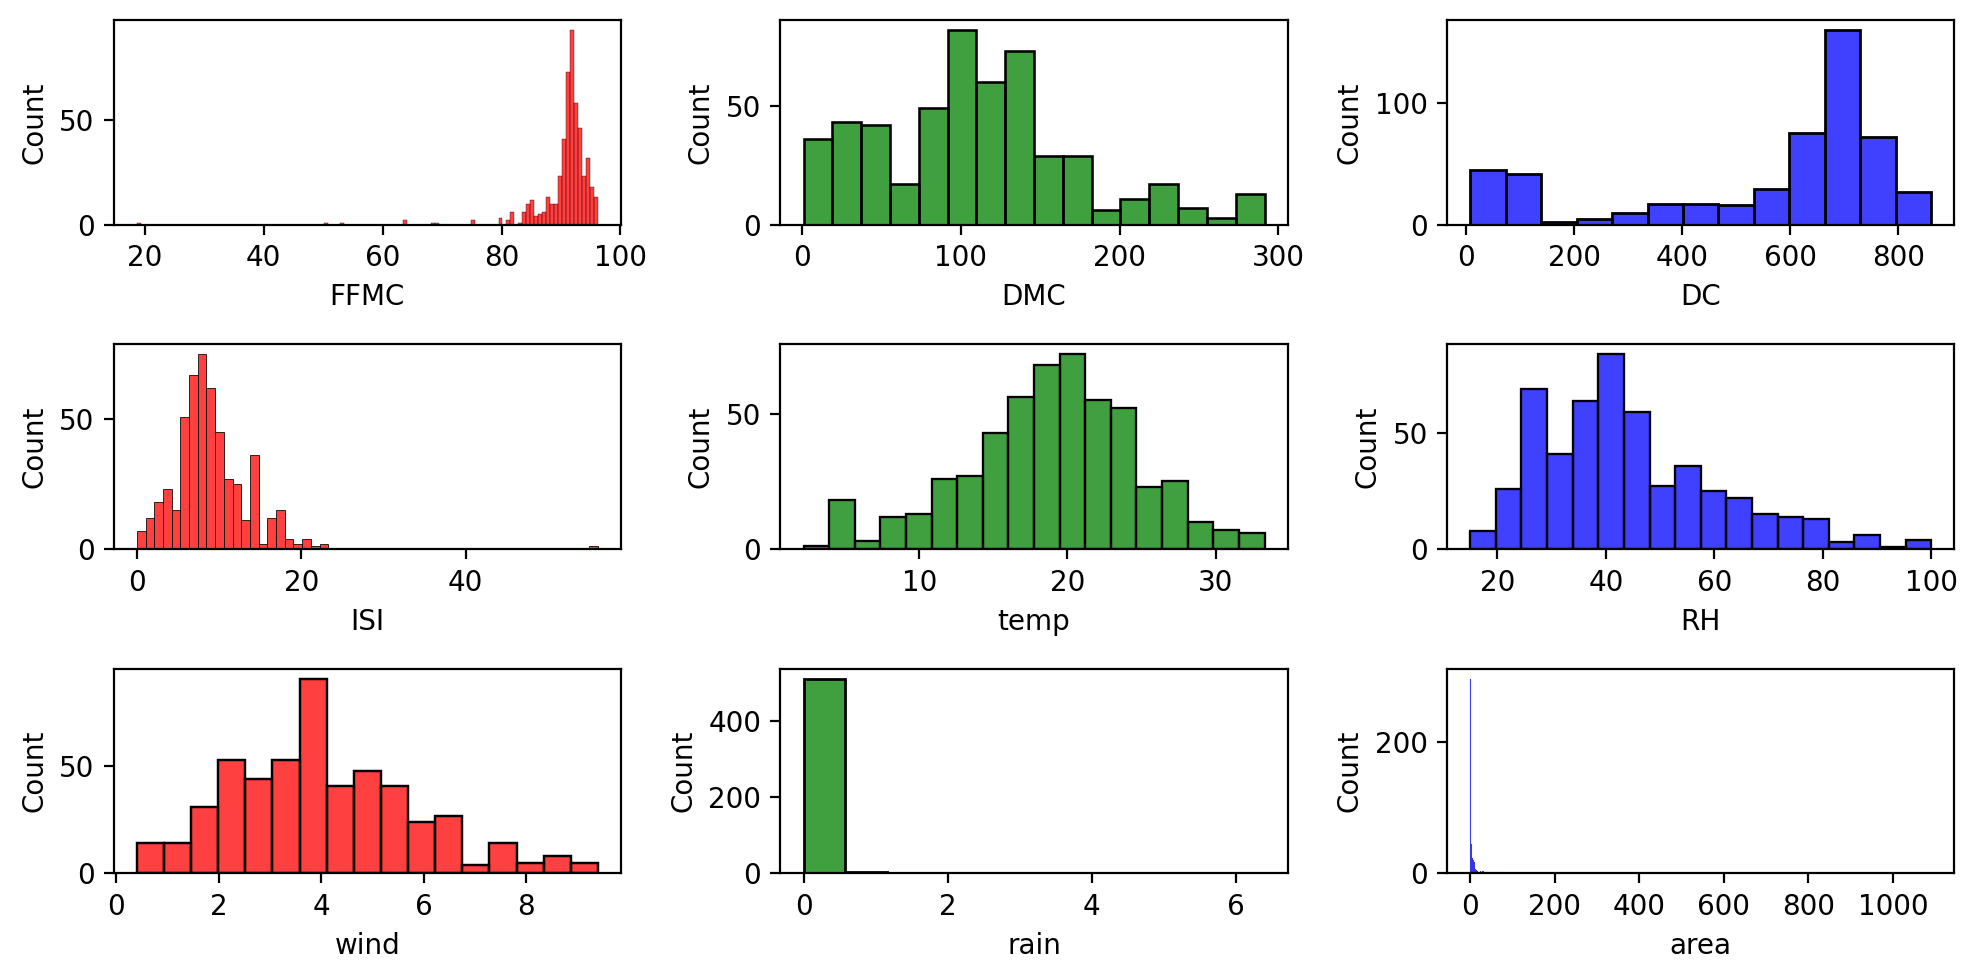

In [8]:
fig, ax = plt.subplots(3, 3)

sns.histplot(df.FFMC, ax=ax[0,0],color='r')
sns.histplot(df.DMC, ax=ax[0,1],color='g')
sns.histplot(df.DC, ax=ax[0,2],color='b')
sns.histplot(df.ISI, ax=ax[1,0],color='r')
sns.histplot(df.temp, ax=ax[1,1],color='g')
sns.histplot(df.RH, ax=ax[1,2],color='b')
sns.histplot(df.wind, ax=ax[2,0],color='r')
sns.histplot(df.rain, ax=ax[2,1],color='g')
sns.histplot(df.area, ax=ax[2,2],color='b')

plt.tight_layout()
plt.show()

In [9]:
# Checking the outliers by plotting Boxplot

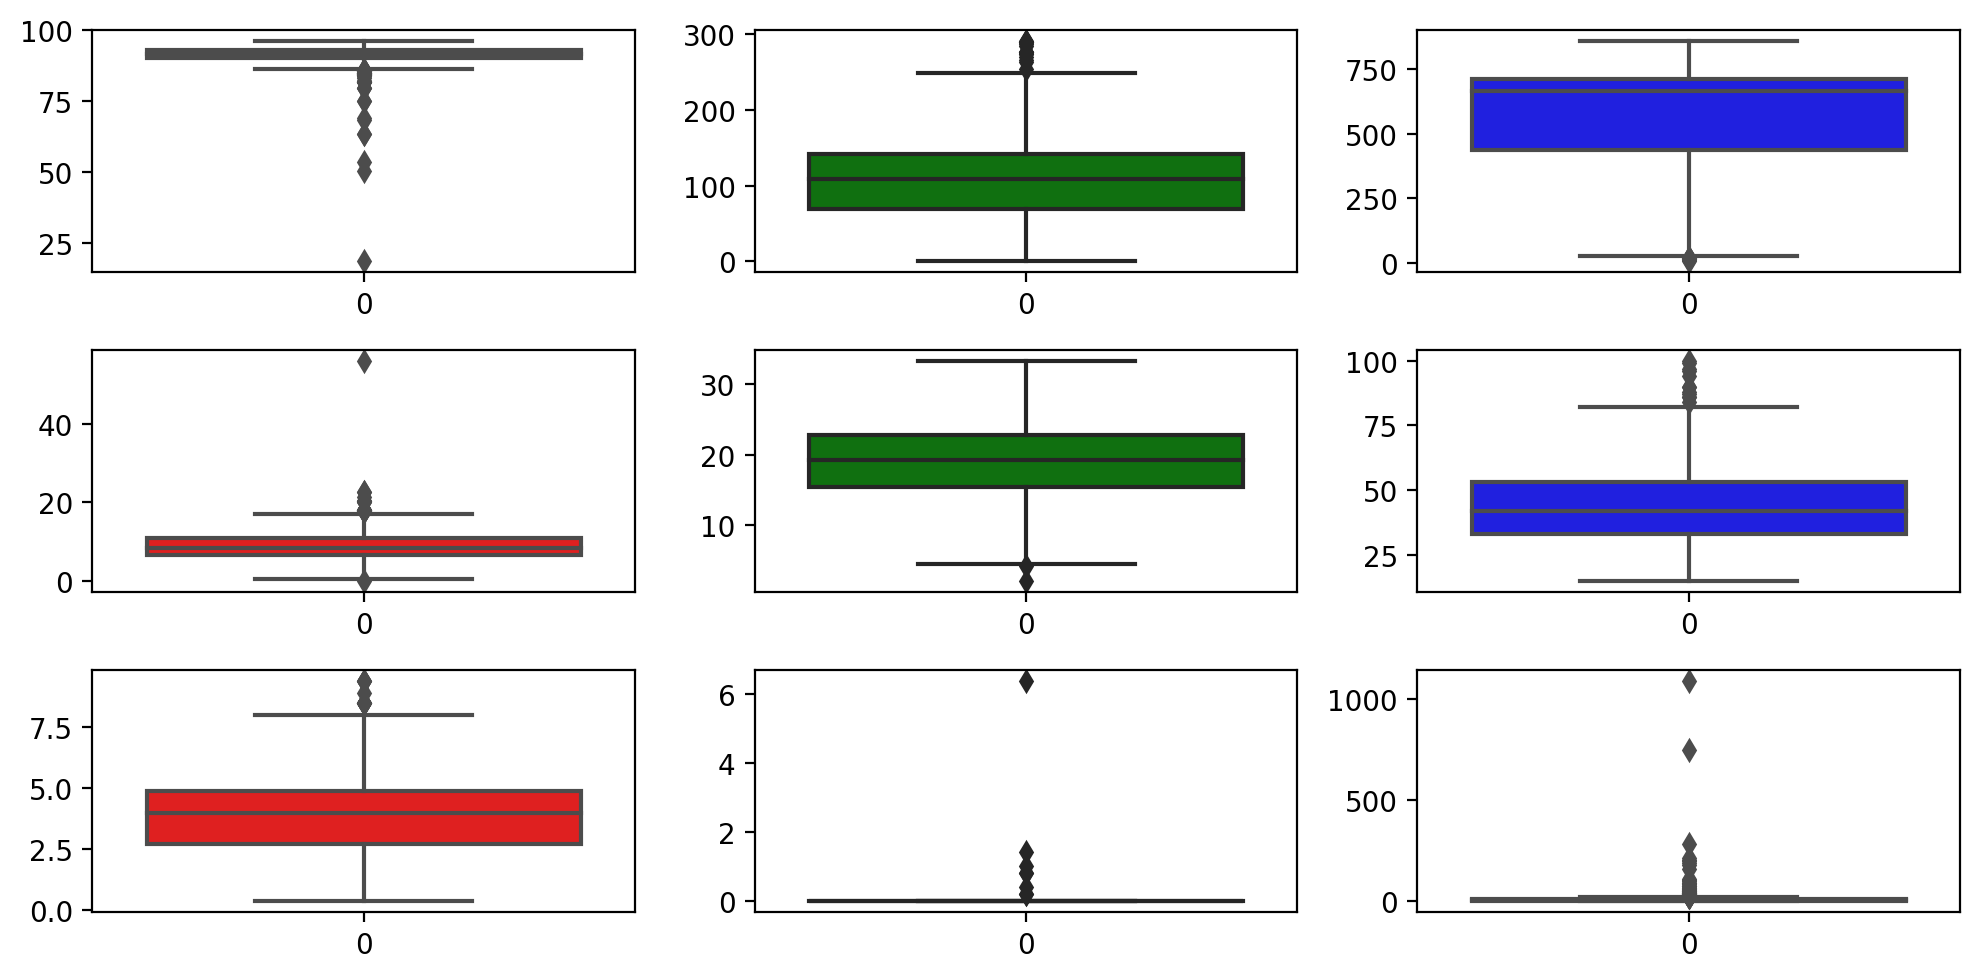

In [10]:
fig, ax = plt.subplots(3, 3)

sns.boxplot(df.FFMC, ax=ax[0,0],color='r')
sns.boxplot(df.DMC, ax=ax[0,1],color='g')
sns.boxplot(df.DC, ax=ax[0,2],color='b')
sns.boxplot(df.ISI, ax=ax[1,0],color='r')
sns.boxplot(df.temp, ax=ax[1,1],color='g')
sns.boxplot(df.RH, ax=ax[1,2],color='b')
sns.boxplot(df.wind, ax=ax[2,0],color='r')
sns.boxplot(df.rain, ax=ax[2,1],color='g')
sns.boxplot(df.area, ax=ax[2,2],color='b')


plt.tight_layout()
plt.show()

In [11]:
# Converting categorical data into numerical data

In [12]:
label_encoder=preprocessing.LabelEncoder()
df["size_category"]=label_encoder.fit_transform(df["size_category"])

In [13]:
df.head(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,1
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,1
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0,1
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,1
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0,1


In [14]:
df.month.replace(("jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"),
                 (1,2,3,4,5,6,7,8,9,10,11,12), inplace = True )
df.day.replace(("mon","tue","wed","thu","fri","sat","sun"),(1,2,3,4,5,6,7), inplace = True )

In [15]:
df.head(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1
5,8,7,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,1
6,8,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,1
7,8,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0,1
8,9,2,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,1
9,9,6,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int64  
 1   day            517 non-null    int64  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    int32  
dtypes: float64(8), int32(1), int64(3)
memory usage: 46.6 KB


In [17]:
# Splitting independent Columns and dependent column from the new dataset
X = df.iloc[:,0:11].values
Y = df.iloc[:,-1].values

In [18]:
# Splitting the dataset into training and test dataset
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.30, random_state=42)  

In [19]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((361, 11), (361,), (156, 11), (156,))

In [20]:
# Constructing a SVM model with the best values 

In [21]:
clf1 = SVC()
param_grid1 = [{'kernel':['rbf'],'gamma':[50,5,0.5,0.2,0.1,0.05],'C':[15,14,20,30,35,48,12,16,29] }]
gsv1 = GridSearchCV(clf1,param_grid1,cv=10)
gsv1.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 20, 30, 35, 48, 12, 16, 29],
                          'gamma': [50, 5, 0.5, 0.2, 0.1, 0.05],
                          'kernel': ['rbf']}])

In [22]:
gsv1.best_params_ , gsv1.best_score_ 

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.7340840840840841)

### Constructing an SVM model with the best values that is obtained from the above Gridsearch CV

In [23]:
clf1 = SVC(C= 15, gamma = 0.05,kernel='rbf')
clf1.fit(X_train , Y_train)
y_pred = clf1.predict(X_test)
acc1 = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc1)
confusion_matrix(Y_test, y_pred)

Accuracy = 74.35897435897436


array([[  2,  39],
       [  1, 114]], dtype=int64)

### Constructing a SVM model with Kernel as polynomial and running it on the grid search to identify the best values with different gamma and C values

In [24]:
clf2 = SVC()
param_grid2 = [{'kernel':['poly'],'gamma':[50,5,0.5,0.2,0.1,0.05],'C':[15,14,20,30,35,48,12,16,29] }]
gsv2 = GridSearchCV(clf2,param_grid2,cv=10)
gsv2.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 20, 30, 35, 48, 12, 16, 29],
                          'gamma': [50, 5, 0.5, 0.2, 0.1, 0.05],
                          'kernel': ['poly']}])

In [25]:
gsv2.best_params_ , gsv2.best_score_ 

({'C': 15, 'gamma': 50, 'kernel': 'poly'}, 0.988963963963964)

### Constructing an SVM model with the best values that is obtained from the above Gridsearch CV with polynomial kernel 

In [26]:
clf2 = SVC(C= 15, gamma = 50, kernel = "poly")
clf2.fit(X_train , Y_train)
y_pred = clf2.predict(X_test)
acc2 = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc2)
confusion_matrix(Y_test, y_pred)

Accuracy = 97.43589743589743


array([[ 38,   3],
       [  1, 114]], dtype=int64)

### Constructing a SVM model with Kernel as Sigmoid and running it on the grid search to identify the best values with different gamma and C values

In [27]:
clf3 = SVC()
param_grid3 = [{'kernel':['sigmoid'],'gamma':[30,50,5,0.5,0.2,0.1,0.05],'C':[15,14,20,30,35,48,12,16,29] }]
gsv3 = GridSearchCV(clf3,param_grid3,cv=10)
gsv3.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 20, 30, 35, 48, 12, 16, 29],
                          'gamma': [30, 50, 5, 0.5, 0.2, 0.1, 0.05],
                          'kernel': ['sigmoid']}])

In [28]:
gsv3.best_params_ , gsv3.best_score_

({'C': 15, 'gamma': 30, 'kernel': 'sigmoid'}, 0.7285285285285286)

### Constructing an SVM model with the best values that is obtained from the above Gridsearch CV with sigmoid kernel 

In [29]:
clf3 = SVC(C= 15, gamma = 30, kernel = "sigmoid")
clf3.fit(X_train , Y_train)
y_pred = clf3.predict(X_test)
acc3 = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc3)
confusion_matrix(Y_test, y_pred)

Accuracy = 73.71794871794873


array([[  0,  41],
       [  0, 115]], dtype=int64)

In [30]:
t={'model':['rbf','poly','sigmoid'],
  'score':[acc1,acc2,acc3]
  }
t=pd.DataFrame(t)
t

,model,score
0,rbf,74.358974
1,poly,97.435897
2,sigmoid,73.717949


## Inference:

Accuracy scores showed that the polynomial SVM is having the best score among them.
So for classification of forest area, the polynomial kernel is best with the accuracy score 97.43%